# Kernel SVM

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import zero_one_loss
np.random.seed(42)

In [2]:
data, labels = make_classification(n_samples=1000, n_features=30, n_informative=15, n_redundant=2, n_repeated=2, n_classes=2, n_clusters_per_class=2, random_state=42, class_sep=0.5)

In [3]:
split = np.int(np.ceil(2*len(data)/3))

train_data = data[:split,:]
train_labels = labels[:split]
test_data = data[split:]
test_labels = labels[split:]

### Grid search cross validation for parameter selection of a gaussian kernel

In [4]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 'auto']}

svc = svm.SVC(kernel = 'rbf')
clf = GridSearchCV(svc, parameters)
clf.fit(train_data, train_labels)
accuracy_cv = clf.cv_results_['mean_test_score']

print('Best accuracy: %0.2f' % clf.best_score_)
print('The best results are given by: ', clf.best_params_)

Best accuracy: 0.86
The best results are given by:  {'C': 10, 'gamma': 0.01}


### Fit best classifier 

In [5]:
clf_best = svm.SVC(C = 10, gamma = 0.01 ,kernel = 'rbf')
clf.fit(train_data,train_labels)
pred_labels = clf.predict(test_data)

zero_one_risk = zero_one_loss(test_labels,pred_labels) # expected loss for test data 


def unbalanced_loss(true_labels, predicted_labels):
    wrong_prediction_indexs = np.where(test_labels != pred_labels)
    wrong_predicted_labels = predicted_labels[wrong_prediction_indexs]
    
    loss = 0
    for pred_label in wrong_predicted_labels:
        if pred_label == 1:
            loss += 1.8
        else:
            loss += 0.2
    return loss/len(true_labels)

unbalanced_loss_risk = unbalanced_loss(test_labels, pred_labels)

print("Zero_one_loss risk: %0.2f" % zero_one_risk)
print("Unbalanced_loss risk: %0.2f" % unbalanced_loss_risk)

Zero_one_loss risk: 0.13
Unbalanced_loss risk: 0.11


### Compare zero-one-loss with an unbalanced loss

/Users/paule/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


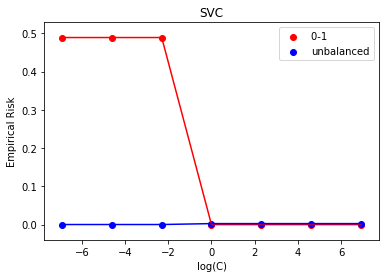

0-1 Best performing C:  0.001
unbalanced Best performing C:  1


In [6]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

zero_one_risks= []
unbalanced_risks = []


for i,c in enumerate(Cs):
    svc = svm.SVC(C= c, kernel = 'rbf')
    svc.fit(train_data, train_labels)
    pred_labels = svc.predict(train_data)

    zero_one_risk = zero_one_loss(train_labels,pred_labels)
    unbalanced_loss_risk = unbalanced_loss(train_labels, pred_labels)
    
    zero_one_risks.append(zero_one_risk)
    unbalanced_risks.append(unbalanced_loss_risk)
    
f, ax = plt.subplots()    
ax.scatter(np.log(Cs), zero_one_risks, label = "0-1 ",c="red")
ax.plot(np.log(Cs), zero_one_risks,c="red")
ax.set_xlabel("log(C)")
ax.set_ylabel("Empirical Risk")        
ax.scatter(np.log(Cs), unbalanced_risks, label = "unbalanced",c="blue")
ax.plot(np.log(Cs), unbalanced_risks,c="blue")
plt.legend()
plt.title("SVC")
plt.show()

print("0-1 Best performing C: ", Cs[np.argmax(zero_one_risks)])
print("unbalanced Best performing C: ", Cs[np.argmax(unbalanced_risks)])

/Users/paule/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


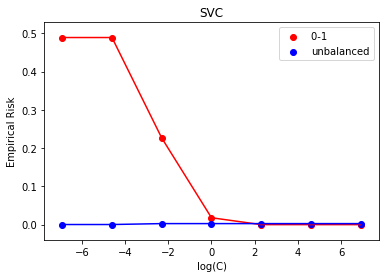

0-1 Best performing C:  0.001
unbalanced Best performing C:  0.1


In [7]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

zero_one_risks= []
unbalanced_risks = []


for i,c in enumerate(Cs):
    svc = svm.SVC(C= c, kernel = 'rbf',gamma = 0.01)
    svc.fit(train_data, train_labels)
    pred_labels = svc.predict(train_data)

    zero_one_risk = zero_one_loss(train_labels,pred_labels)
    unbalanced_loss_risk = unbalanced_loss(train_labels, pred_labels)
    
    zero_one_risks.append(zero_one_risk)
    unbalanced_risks.append(unbalanced_loss_risk)
    

    
    
    
f, ax = plt.subplots()    
ax.scatter(np.log(Cs), zero_one_risks, label = "0-1 ",c="red")
ax.plot(np.log(Cs), zero_one_risks,c="red")
ax.set_xlabel("log(C)")
ax.set_ylabel("Empirical Risk")        
ax.scatter(np.log(Cs), unbalanced_risks, label = "unbalanced",c="blue")
ax.plot(np.log(Cs), unbalanced_risks,c="blue")
plt.legend()
plt.title("SVC")
plt.show()

print("0-1 Best performing C: ", Cs[np.argmax(zero_one_risks)])
print("unbalanced Best performing C: ", Cs[np.argmax(unbalanced_risks)])

The best performing $C$ changes from $C = 1$ to $C = 0.1$ for the unbalanced loss. We notice that the empirical risk for the 0-1 loss drops earlier for small C (0.1), but not as steep as for the default chosen gamma.

### Compare the behavior of different kernels

In [8]:
X, Y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, random_state=42, class_sep=0.75)
X_train, Y_train = X[:120], Y[:120]
X_test, Y_test = X[120:], Y[120:]

In [37]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10 ], 
              'gamma': [0.001, 0.01, 0.1, 1, 10,'auto']}

svc = svm.SVC(kernel = 'rbf')
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, Y_train)
accuracy_cv = clf.cv_results_['mean_test_score']

print('Gaussian Kernel')
print('Best accuracy: %0.2f' % clf.best_score_)
print('The best results are given by: ', clf.best_params_)

Gaussian Kernel
Best accuracy: 0.82
The best results are given by:  {'C': 1, 'gamma': 'auto'}


In [31]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10]}

svc = svm.SVC(kernel = 'linear')
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, Y_train)
accuracy_cv = clf.cv_results_['mean_test_score']

print('Linear Kernel')
print('Best accuracy: %0.2f' % clf.best_score_)
print('The best results are given by: ', clf.best_params_)

Linear Kernel
Best accuracy: 0.82
The best results are given by:  {'C': 0.1}


In [42]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10], 
              'gamma': [0.001, 0.01, 0.1, 1, 10,'auto']}

svc = svm.SVC(kernel = 'poly', degree = 2)
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, Y_train)
accuracy_cv = clf.cv_results_['mean_test_score']

print('Polynomial Kernel, Degree 2')
print('Best accuracy: %0.2f' % clf.best_score_)
print('The best results are given by: ', clf.best_params_)

Polynomial Kernel, Degree 2
Best accuracy: 0.59
The best results are given by:  {'C': 0.1, 'gamma': 10}


In [44]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10], 
              'gamma': [0.001, 0.01, 0.1, 1, 10,'auto']}

svc = svm.SVC(kernel = 'poly',degree = 3)
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, Y_train)
accuracy_cv = clf.cv_results_['mean_test_score']

print('Polynomial Kernel, Degree 3')
print('Best accuracy: %0.2f' % clf.best_score_)
print('The best results are given by: ', clf.best_params_)

Polynomial Kernel, Degree 3
Best accuracy: 0.73
The best results are given by:  {'C': 0.01, 'gamma': 1}


In [ ]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10 ], 
              'gamma': [0.001, 0.01, 0.1, 1, 10,'auto'],
              'kernel':('rbf', 'linear','poly'),
              'degree':[2,3]}

svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, Y_train)
accuracy_cv = clf.cv_results_['mean_test_score']

print('Best performance over all ')
print('Best accuracy: %0.2f' % clf.best_score_)
print('The best results are given by: ', clf.best_params_)

### f)

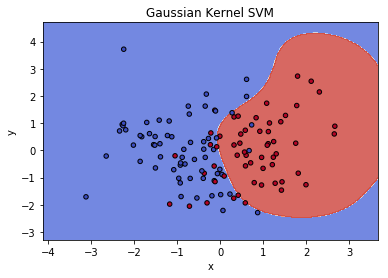

In [39]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

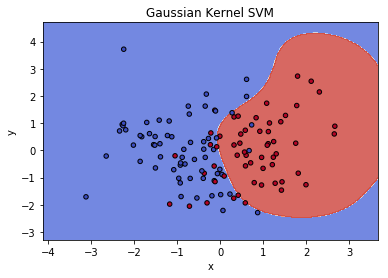

In [40]:
# Gaussian kernel
C = 1.0
gamma = 'auto'
model = svm.SVC(C = C,kernel = 'rbf', gamma = gamma)
model = model.fit(X_train, Y_train)

xx, yy = make_meshgrid(X_train[:, 0], X_train[:, 1])
    
plot_contours(plt, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('x')
plt.ylabel('y')
plt.title("Gaussian Kernel SVM")
plt.show()



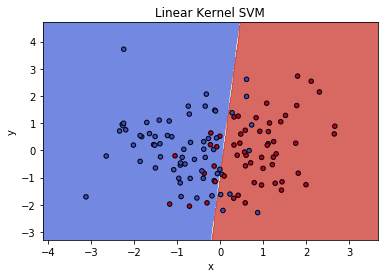

In [41]:
# Linear kernel
C = 0.1
model = svm.SVC(C = C,kernel = 'linear')
model = model.fit(X_train, Y_train)

xx, yy = make_meshgrid(X_train[:, 0], X_train[:, 1])
    
plot_contours(plt, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('x')
plt.ylabel('y')
plt.title("Linear Kernel SVM")
plt.show()



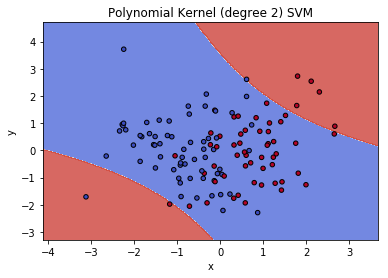

In [43]:
# Polynomial kernel, degree 2
C = 0.1
gamma = 10
model = svm.SVC(C = C,kernel = 'poly', degree = 2, gamma = gamma)
model = model.fit(X_train, Y_train)

xx, yy = make_meshgrid(X_train[:, 0], X_train[:, 1])
    
plot_contours(plt, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('x')
plt.ylabel('y')
plt.title("Polynomial Kernel (degree 2) SVM")
plt.show()



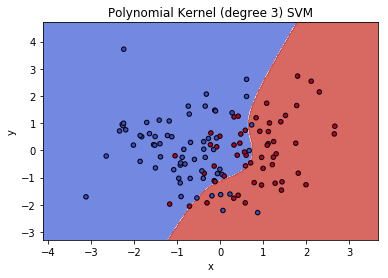

In [45]:
# Polynomial kernel, degree 3
C = 0.01
gamma = 1
model = svm.SVC(C = C,kernel = 'poly', degree = 3, gamma = gamma)
model = model.fit(X_train, Y_train)

xx, yy = make_meshgrid(X_train[:, 0], X_train[:, 1])
    
plot_contours(plt, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('x')
plt.ylabel('y')
plt.title("Polynomial Kernel (degree 3) SVM")
plt.show()